In [1]:
# more data frame -> example ()
# value_counts
# sort_values
# rank
# sort_index
# set_index
# rename index -> rename
# reset_index
# unique & nunique
# isnull/notnull/hasnans
# dropna
# fillna
# drop_duplicates
# drop
# apply
# isin
# corr
# nlargest -> nsmallest
# insert
# copy


In [5]:
import numpy as np
import pandas as pd

In [8]:
# 1) value_counts ( series and DataFrame)

marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [80,70,14],
    [80,70,14]
], columns = ['iq','Marks','Package'])

marks

,iq,Marks,Package
0,100,80,10
1,90,70,7
2,80,70,14
3,80,70,14


In [ ]:
# value_counts -> count how many rows are repeated and give the number of times it is repeated
marks.value_counts()

iq   Marks  Package
80   70     14         2
90   70     7          1
100  80     10         1
Name: count, dtype: int64

In [13]:
# import ipl match data ste 
ipl = pd.read_csv('ipl-matches.csv')
ipl.head(2) 

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [19]:
# Find which player has won most player of the match -> in finals and qualifiers
ipl[~ipl['MatchNumber'].str.isdigit()]['Player_of_Match'].value_counts()


Player_of_Match
F du Plessis         3
SK Raina             3
KA Pollard           3
JJ Bumrah            2
AB de Villiers       2
MK Pandey            2
M Vijay              2
A Kumble             2
YK Pathan            2
SR Watson            2
HH Pandya            1
RM Patidar           1
JC Buttler           1
RR Pant              1
KS Williamson        1
MP Stoinis           1
TA Boult             1
SP Narine            1
RD Gaikwad           1
VR Iyer              1
DA Miller            1
Washington Sundar    1
NM Coulter-Nile      1
KV Sharma            1
BCJ Cutting          1
KH Pandya            1
SA Yadav             1
Rashid Khan          1
AD Russell           1
RG Sharma            1
A Nehra              1
DA Warner            1
MC Henriques         1
Harbhajan Singh      1
BJ Hodge             1
UT Yadav             1
V Sehwag             1
MS Bisla             1
MEK Hussey           1
CH Gayle             1
MS Dhoni             1
MM Patel             1
DE Bollinger      

In [20]:
# Toss Dicision plot 
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


<Axes: ylabel='count'>

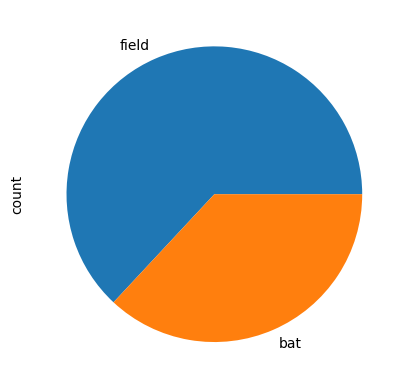

In [22]:
ipl['TossDecision'].value_counts().plot(kind='pie')

In [23]:
# how many matches each team has played

ipl['Team1'].value_counts()

Team1
Royal Challengers Bangalore    126
Mumbai Indians                 112
Chennai Super Kings            111
Kolkata Knight Riders          105
Kings XI Punjab                 92
Rajasthan Royals                89
Delhi Daredevils                85
Sunrisers Hyderabad             69
Deccan Chargers                 39
Delhi Capitals                  29
Pune Warriors                   23
Punjab Kings                    18
Gujarat Lions                   16
Lucknow Super Giants             8
Gujarat Titans                   7
Rising Pune Supergiant           7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [24]:
ipl['Team2'].value_counts()

Team2
Mumbai Indians                 119
Kolkata Knight Riders          118
Rajasthan Royals               103
Royal Challengers Bangalore    100
Kings XI Punjab                 98
Chennai Super Kings             97
Sunrisers Hyderabad             83
Delhi Daredevils                76
Deccan Chargers                 36
Delhi Capitals                  34
Pune Warriors                   23
Gujarat Lions                   14
Punjab Kings                    10
Gujarat Titans                   9
Rising Pune Supergiant           9
Lucknow Super Giants             7
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Name: count, dtype: int64

In [26]:
(ipl['Team1'].value_counts() + ipl['Team2'].value_counts()).sort_values(ascending=False)

Mumbai Indians                 231
Royal Challengers Bangalore    226
Kolkata Knight Riders          223
Chennai Super Kings            208
Rajasthan Royals               192
Kings XI Punjab                190
Delhi Daredevils               161
Sunrisers Hyderabad            152
Deccan Chargers                 75
Delhi Capitals                  63
Pune Warriors                   46
Gujarat Lions                   30
Punjab Kings                    28
Gujarat Titans                  16
Rising Pune Supergiant          16
Lucknow Super Giants            15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

In [ ]:
### 2) sort_values -> ( Series and DataFrame) -> 

In [27]:
x = pd.Series([10,12,40,22,43,89,90,99])
x

0    10
1    12
2    40
3    22
4    43
5    89
6    90
7    99
dtype: int64

In [28]:
x.sort_values()

0    10
1    12
3    22
2    40
4    43
5    89
6    90
7    99
dtype: int64

In [29]:
# in ascending order
x.sort_values(ascending=False)

7    99
6    90
5    89
4    43
2    40
3    22
1    12
0    10
dtype: int64

In [32]:
movies = pd.read_csv('movies.csv')
movies.head(1)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)


In [35]:
# apply sort_values in this data Frame -> can be used in multiple columns


movies.sort_values('title_x')

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1498,16 December (film),tt0313844,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/16_December_(film),16-Dec,16-Dec,0,2002,158,Action|Thriller,6.9,1091,16 December 1971 was the day when India won t...,Indian intelligence agents race against time t...,NaN,Danny Denzongpa|Gulshan Grover|Milind Soman|Di...,2 nominations,22 March 2002 (India)
1021,1920 (film),tt1301698,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_(film),1920,1920,0,2008,138,Horror|Mystery|Romance,6.4,2588,A devotee of Bhagwan Shri Hanuman Arjun Singh...,After forsaking his family and religion a hus...,A Love Made in Heaven...A Revenge Born in Hell...,Rajniesh Duggall|Adah Sharma|Anjori Alagh|Raj ...,NaN,12 September 2008 (India)
287,1920: London,tt5638500,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1920_London,1920 London,1920 London,0,2016,120,Horror|Mystery,4.1,1373,Shivangi (Meera Chopra) lives in London with h...,After her husband is possessed by an evil spir...,Fear strikes again,Sharman Joshi|Meera Chopra|Vishal Karwal|Suren...,NaN,6 May 2016 (USA)
723,1920: The Evil Returns,tt2222550,https://upload.wikimedia.org/wikipedia/en/e/e7...,https://en.wikipedia.org/wiki/1920:_The_Evil_R...,1920: Evil Returns,1920: Evil Returns,0,2012,124,Drama|Horror|Romance,4.8,1587,This story revolves around a famous poet who m...,This story revolves around a famous poet who m...,Possession is back,Vicky Ahuja|Tia Bajpai|Irma Jämhammar|Sharad K...,NaN,2 November 2012 (India)
1039,1971 (2007 film),tt0983990,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/1971_(2007_film),1971,1971,0,2007,160,Action|Drama|War,7.9,1121,Based on true facts the film revolves around ...,Based on true facts the film revolves around ...,Honor the heroes.......,Manoj Bajpayee|Ravi Kishan|Deepak Dobriyal|,1 win,9 March 2007 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,Zindagi Na Milegi Dobara,tt1562872,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Na_Mileg...,Zindagi Na Milegi Dobara,Zindagi Na Milegi Dobara,0,2011,155,Comedy|Drama,8.1,60826,Three friends decide to turn their fantasy vac...,Three friends decide to turn their fantasy vac...,NaN,Hrithik Roshan|Farhan Akhtar|Abhay Deol|Katrin...,30 wins & 22 nominations,15 July 2011 (India)
670,Zindagi Tere Naam,tt2164702,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zindagi_Tere_Naam,Zindagi Tere Naam,Zindagi Tere Naam,0,2012,120,Romance,4.7,27,Mr. Singh an elderly gentleman relates to hi...,Mr. Singh an elderly gentleman relates to hi...,NaN,Mithun Chakraborty|Ranjeeta Kaur|Priyanka Meht...,1 win,16 March 2012 (India)
756,Zokkomon,tt1605790,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zokkomon,Zokkomon,Zokkomon,0,2011,109,Action|Adventure,4.0,274,After the passing of his parents in an acciden...,An orphan is abused and abandoned believed to...,Betrayal. Friendship. Bravery.,Darsheel Safary|Anupam Kher|Manjari Fadnnis|Ti...,NaN,22 April 2011 (India)
939,Zor Lagaa Ke...Haiya!,tt1479857,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Zor_Lagaa_Ke...H...,Zor Lagaa Ke... Haiya!,Zor Lagaa Ke... Haiya!,0,2009,\N,Comedy|Drama|Family,6.4,46,A tree narrates the story of four Mumbai-based...,Children build a tree-house to spy on a beggar...,NaN,Meghan Jadhav|Mithun Chakraborty|Riya Sen|Seem...,NaN,NaN


In [38]:
# -> 
students = pd.DataFrame(
    {
        'name':['Harsh','Hritik','Aniket',np.nan,'Rakesh',np.nan,'Rishabh',np.nan,'Kartik',np.nan],
        'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',np.nan,np.nan,'git'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse','bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]
    }
)

students


,name,college,branch,cgpa,package
0,Harsh,bit,eee,6.66,4.0
1,Hritik,iit,it,8.25,5.0
2,Aniket,vit,cse,6.41,6.0
3,NaN,NaN,NaN,NaN,NaN
4,Rakesh,NaN,me,5.60,6.0
5,NaN,vlsi,ce,9.00,7.0
6,Rishabh,ssit,civ,7.40,8.0
7,NaN,NaN,cse,10.00,9.0
8,Kartik,NaN,bio,7.40,NaN
9,NaN,git,NaN,NaN,NaN


In [39]:
# if there are missing values -> then if we apply sort_values(), -> then all nan values are in last 
students.sort_values('name')

,name,college,branch,cgpa,package
2,Aniket,vit,cse,6.41,6.0
0,Harsh,bit,eee,6.66,4.0
1,Hritik,iit,it,8.25,5.0
8,Kartik,NaN,bio,7.40,NaN
4,Rakesh,NaN,me,5.60,6.0
6,Rishabh,ssit,civ,7.40,8.0
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.00,7.0
7,NaN,NaN,cse,10.00,9.0
9,NaN,git,NaN,NaN,NaN


In [40]:
# -> inplace -> store result permenent in the data set 

In [ ]:
# to sort on the basis of multiple coulmns in movies data set 
movies.head(1)
# year wise sorting along with alphabet sorting 

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)


In [42]:
movies.sort_values(['year_of_release','title_x'])

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1575,Aalavandhan,tt0294264,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aalavandhan,Aalavandhan,Aalavandhan,0,2001,177,Action|Thriller,7.1,1746,The story follows Abhay (Haasan) who has a dis...,A psychopath tries to protect his twin brother...,The Fearless,Kamal Haasan|Raveena Tandon|Manisha Koirala|Ki...,1 win & 1 nomination,16 November 2001 (India)
1576,Aamdani Atthanni Kharcha Rupaiya,tt0305173,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aamdani_Atthanni...,Aamdani Atthanni Kharcha Rupaiya,Aamdani Atthanni Kharcha Rupaiya,0,2001,150,Comedy|Drama|Family,4.7,1026,Jhoomri and her husband Bhimsha move into a ...,In order to make ends meet three women steps ...,NaN,Govinda|Juhi Chawla|Tabu|Chandrachur Singh|Joh...,1 nomination,21 December 2001 (India)
1577,Aashiq (2001 film),tt0273406,https://upload.wikimedia.org/wikipedia/en/c/c6...,https://en.wikipedia.org/wiki/Aashiq_(2001_film),Aashiq,Aashiq,0,2001,160,Action|Drama|Romance,3.8,357,Pooja and Chander Kapoor have a heart-to-heart...,Pooja and Chander Kapoor have a heart-to-heart...,NaN,Bobby Deol|Karisma Kapoor|,NaN,26 January 2001 (India)
1579,Ajnabee (2001 film),tt0278291,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ajnabee_(2001_film),Ajnabee,Ajnabee,0,2001,165,Action|Crime|Drama,6.3,7480,A new couple get married and move to Switzerla...,Bobby Deol and Kareena Kapoor play a new coupl...,Trust no one,Akshay Kumar|Bobby Deol|Kareena Kapoor|Bipasha...,3 wins & 9 nominations,21 September 2001 (India)
1578,Aks (2001 film),tt0289845,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Aks_(2001_film),Aks,Aks,0,2001,184,Action|Crime|Horror,5.9,1518,Aks is the story of a hunter and his prey. A c...,Raghavan Ghatge a psychotic terrorist and Ma...,There is a stranger in your mirror,Amitabh Bachchan|Raveena Tandon|Manoj Bajpayee...,9 wins & 14 nominations,13 July 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,Ujda Chaman,tt11046300,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Ujda_Chaman,Ujda Chaman,Ujda Chaman,0,2019,120,Comedy,8.1,1440,Ujda Chaman is about a 30 -year-old bachelor C...,Ujda Chaman is about a 30 -year-old bachelor C...,NaN,Sunny Singh Nijjar|Maanvi Gagroo|Saurabh Shukl...,NaN,1 November 2019 (USA)
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Uri:_The_Surgica...,Uri: The Surgical Strike,Uri: The Surgical Strike,0,2019,138,Action|Drama|War,8.4,35112,Divided over five chapters the film chronicle...,Indian army special forces execute a covert op...,NaN,Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...,4 wins,11 January 2019 (USA)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
60,Yaaram (2019 film),tt11007050,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yaaram_(2019_film),#Yaaram,#Yaaram,0,2019,\N,Comedy|Romance,5.7,7,All set for an arranged marriage Rohit Bajaj ...,All set for an arranged marriage Rohit Bajaj ...,NaN,Siddhanth Kapoor|Prateik|Anita Raj|Ishita Raj|...,NaN,NaN


In [47]:
# rank -> 
# using ipl -Batsman runs data set 

runs = pd.read_csv('batsman_runs_ipl.csv')
runs

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25
...,...,...
600,Yash Dayal,0
601,Yashpal Singh,47
602,Younis Khan,3
603,Yuvraj Singh,2754


In [51]:
# rank -> make a new column and add the over all rank based on the runs 

runs['batsman_rank'] = runs['batsman_run'].rank(ascending=False)
runs.sort_values('batsman_rank')

,batter,batsman_run,batsman_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
570,V Pratap Singh,0,594.0
63,Abdur Razzak,0,594.0
562,U Kaul,0,594.0
65,Akash Deep,0,594.0


In [52]:
# sort_index( series and dataframe)

marks = {
    'math':44,
    'english':55,
    'hindi':22
}

marks_series= pd.Series(marks)
marks_series

math       44
english    55
hindi      22
dtype: int64

In [53]:
marks_series.sort_index()

english    55
hindi      22
math       44
dtype: int64

In [54]:
# sort the data frame using sort_index
movies.sort_index(ascending=False)

,title_x,imdb_id,poster_path,wiki_link,title_y,original_title,is_adult,year_of_release,runtime,genres,imdb_rating,imdb_votes,story,summary,tagline,actors,wins_nominations,release_date
1628,Humsafar,tt2403201,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Humsafar,Humsafar,Humsafar,0,2011,35,Drama|Romance,9.0,2968,Sara and Ashar are childhood friends who share...,Ashar and Khirad are forced to get married due...,NaN,Fawad Khan|,NaN,TV Series (2011–2012)
1627,Daaka,tt10833860,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Daaka,Daaka,Daaka,0,2019,136,Action,7.4,38,Shinda tries robbing a bank so he can be wealt...,Shinda tries robbing a bank so he can be wealt...,NaN,Gippy Grewal|Zareen Khan|,NaN,1 November 2019 (USA)
1626,Sabse Bada Sukh,tt0069204,NaN,https://en.wikipedia.org/wiki/Sabse_Bada_Sukh,Sabse Bada Sukh,Sabse Bada Sukh,0,2018,\N,Comedy|Drama,6.1,13,Village born Lalloo re-locates to Bombay and ...,Village born Lalloo re-locates to Bombay and ...,NaN,Vijay Arora|Asrani|Rajni Bala|Kumud Damle|Utpa...,NaN,NaN
1625,Yeh Zindagi Ka Safar,tt0298607,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Yeh_Zindagi_Ka_S...,Yeh Zindagi Ka Safar,Yeh Zindagi Ka Safar,0,2001,146,Drama,3.0,133,Hindi pop-star Sarina Devan lives a wealthy ...,A singer finds out she was adopted when the ed...,NaN,Ameesha Patel|Jimmy Sheirgill|Nafisa Ali|Gulsh...,NaN,16 November 2001 (India)
1624,Tera Mera Saath Rahen,tt0301250,https://upload.wikimedia.org/wikipedia/en/2/2b...,https://en.wikipedia.org/wiki/Tera_Mera_Saath_...,Tera Mera Saath Rahen,Tera Mera Saath Rahen,0,2001,148,Drama,4.9,278,Raj Dixit lives with his younger brother Rahu...,A man is torn between his handicapped brother ...,NaN,Ajay Devgn|Sonali Bendre|Namrata Shirodkar|Pre...,NaN,7 November 2001 (India)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Evening Shadows,tt6028796,NaN,https://en.wikipedia.org/wiki/Evening_Shadows,Evening Shadows,Evening Shadows,0,2018,102,Drama,7.3,280,While gay rights and marriage equality has bee...,Under the 'Evening Shadows' truth often plays...,NaN,Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...,17 wins & 1 nomination,11 January 2019 (India)
3,Why Cheat India,tt8108208,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/Why_Cheat_India,Why Cheat India,Why Cheat India,0,2019,121,Crime|Drama,6.0,1891,The movie focuses on existing malpractices in ...,The movie focuses on existing malpractices in ...,NaN,Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...,NaN,18 January 2019 (USA)
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...,https://en.wikipedia.org/wiki/The_Accidental_P...,The Accidental Prime Minister,The Accidental Prime Minister,0,2019,112,Biography|Drama,6.1,5549,Based on the memoir by Indian policy analyst S...,Explores Manmohan Singh's tenure as the Prime ...,NaN,Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...,NaN,11 January 2019 (USA)
1,Battalion 609,tt9472208,NaN,https://en.wikipedia.org/wiki/Battalion_609,Battalion 609,Battalion 609,0,2019,131,War,4.1,73,The story revolves around a cricket match betw...,The story of Battalion 609 revolves around a c...,NaN,Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...,NaN,11 January 2019 (India)
